In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmasher
from matplotlib.lines import Line2D
import numpy as np
import netCDF4 as nc
%matplotlib inline
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'
plt.rcParams['font.size'] = 14

In [2]:
# constants
secondsPerDay = 86400
nx = 500
ny = 500
f0 = 1.4e-4

# plotting params
deepIndex = 30
timestep = [34,346,127,658]
xIndex = [248,341,251,250]
yMin = [150,0,285,0]
yMax = [350,499,330,499]
myCmap = cmasher.cm.waterlily

# io params
loc0 = f"/scratch/hcm7920/amb0/data/"
loc100 = f"/scratch/hcm7920/amb100/data/"
conc = ["0", "20", "40", "60", "80", "100"]
saveloc = "/home/hcm7920/experiments/arcticMiddepthBI/plots/"  

In [3]:
# load data

yRange = [y for y in range(yMin[0],yMax[0])]
state = nc.Dataset(loc100+"state.nc")
depth = state["Z"][:deepIndex]
salt = state["S"]
saltSection1 = salt[timestep[0],:deepIndex,yRange,xIndex[0]]
state = nc.Dataset(loc100+"diagsSnapshots.nc")
vortSection1 = state["momVort3"][timestep[0]-1,:deepIndex,yRange,xIndex[0]]/f0

yRange = [y for y in range(yMin[1],yMax[1])]
state = nc.Dataset(loc100+"state.nc")
salt = state["S"]
saltSection2 = salt[timestep[1],:deepIndex,yRange,xIndex[1]]
state = nc.Dataset(loc100+"diagsSnapshots.nc")
vortSection2 = state["momVort3"][timestep[1]-1,:deepIndex,yRange,xIndex[1]]/f0

yRange = [y for y in range(yMin[2],yMax[2])]
state = nc.Dataset(loc100+"state.nc")
salt = state["S"]
saltSection3 = salt[timestep[2],:deepIndex,yRange,xIndex[2]]
state = nc.Dataset(loc100+"diagsSnapshots.nc")
vortSection3 = state["momVort3"][timestep[2]-1,:deepIndex,yRange,xIndex[2]]/f0

yRange = [y for y in range(yMin[3],yMax[3])]
state = nc.Dataset(loc100+"state.nc")
salt = state["S"]
saltSection4 = salt[timestep[3],:deepIndex,yRange,xIndex[3]]
state = nc.Dataset(loc100+"diagsSnapshots.nc")
vortSection4 = state["momVort3"][timestep[3]-1,:deepIndex,yRange,xIndex[3]]/f0

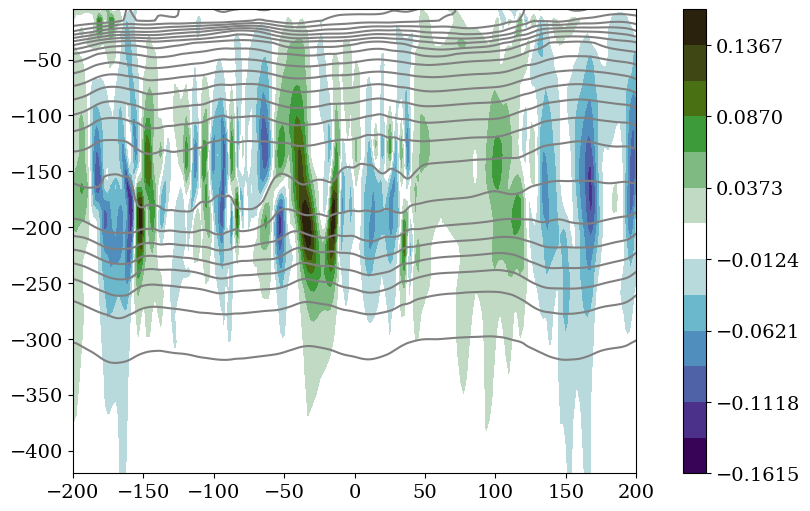

In [4]:
# plot salt section 1

myMax = saltSection1.max()
myMin = saltSection1.min()
myLevs1 = np.linspace(myMin,myMax,25)

myMax = abs(vortSection1).max()
myLevs = np.linspace(-myMax,myMax,14)

plt.figure(layout="constrained",figsize=(8,5))

horizDistanceKm = np.linspace(yMin[0],yMax[0],saltSection1.shape[1])*2 - 500
plt.contour(horizDistanceKm,depth,saltSection1,myLevs1,colors="grey")
plt.contourf(horizDistanceKm,depth,vortSection1,myLevs,cmap=myCmap)
plt.colorbar()

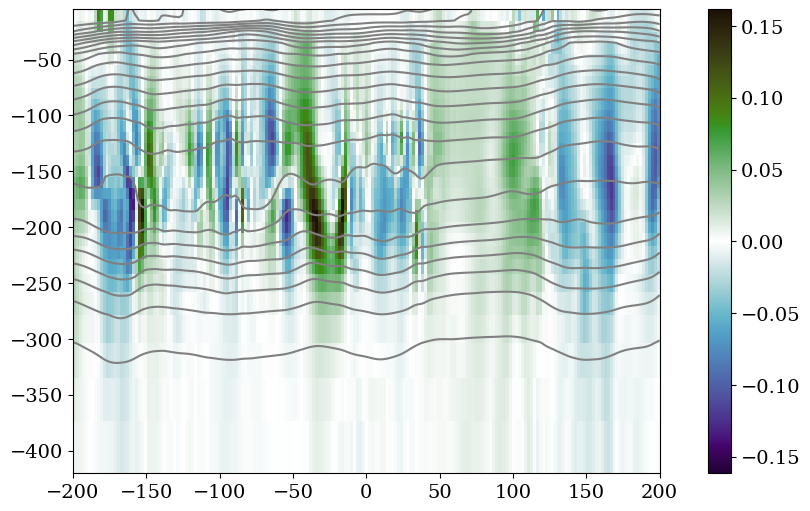

In [5]:
# test cmocean colormap

myMax = saltSection1.max()
myMin = saltSection1.min()
myLevs1 = np.linspace(myMin,myMax,25)

myMax = abs(vortSection1).max()
myLevs = np.linspace(-myMax,myMax,14)

plt.figure(layout="constrained",figsize=(8,5))

horizDistanceKm = np.linspace(yMin[0],yMax[0],saltSection1.shape[1])*2 - 500
plt.contour(horizDistanceKm,depth,saltSection1,myLevs1,colors="grey")
plt.pcolormesh(horizDistanceKm,depth,vortSection1[1:,1:],
               cmap=myCmap,vmin=-myMax,vmax=myMax)
plt.colorbar()

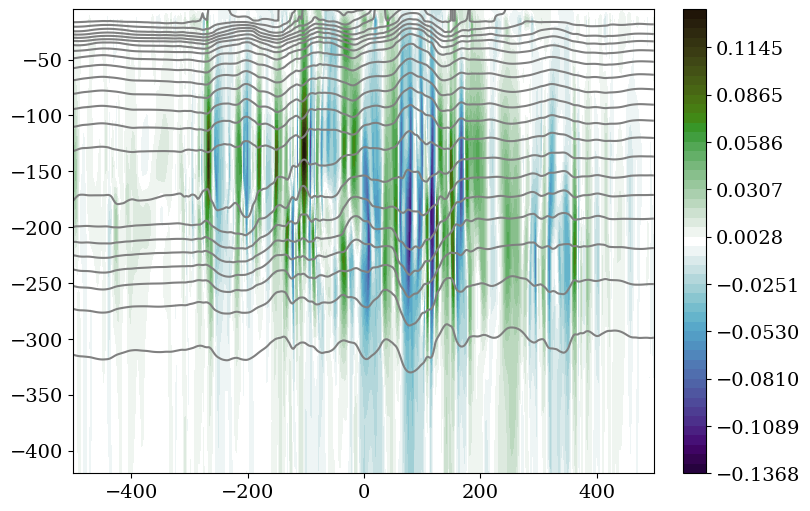

In [6]:
# plot salt section 2

myMax = saltSection2.max()
myMin = saltSection2.min()
myLevs1 = np.linspace(myMin,myMax,25)

myMax = abs(vortSection2).max()
myLevs = np.linspace(-myMax,myMax,50)

plt.figure(layout="constrained",figsize=(8,5))

horizDistanceKm = np.linspace(yMin[1],yMax[1],saltSection2.shape[1])*2 - 500
plt.contour(horizDistanceKm,depth,saltSection2,myLevs1,colors="grey")
plt.contourf(horizDistanceKm,depth,vortSection2,myLevs,cmap=myCmap)
plt.colorbar()

Text(0.5, 1.0, 'Across channel salinity snapshot')

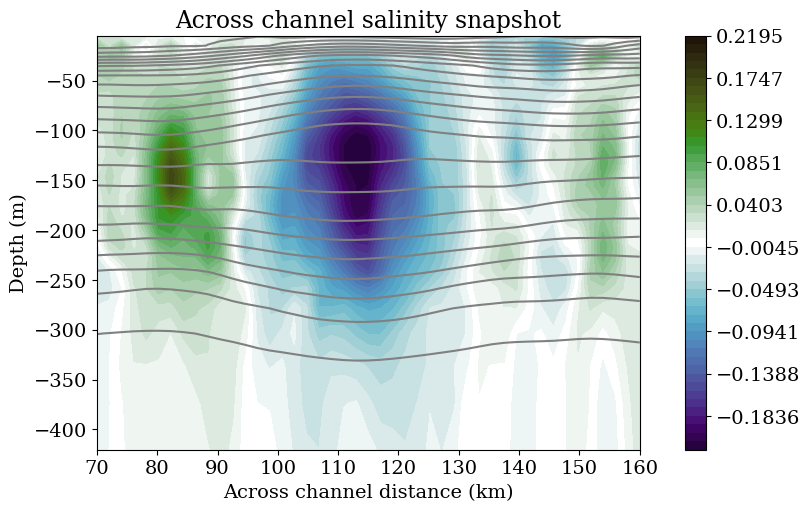

In [7]:
# plot salt section 3

myMax = saltSection3.max()
myMin = saltSection3.min()
myLevs = np.linspace(myMin,myMax,25)

myMax = abs(vortSection3).max()
myLevs1 = np.linspace(-myMax,myMax,50)

plt.figure(layout="constrained",figsize=(8,5))

horizDistanceKm = np.linspace(yMin[2],yMax[2],saltSection3.shape[1])*2 - 500
plt.contour(horizDistanceKm,depth,saltSection3,myLevs,colors="grey")
plt.contourf(horizDistanceKm,depth,vortSection3,myLevs1,cmap=myCmap)
cbar = plt.colorbar()
plt.ylabel("Depth (m)")
plt.xlabel("Across channel distance (km)")
plt.title("Across channel salinity snapshot")

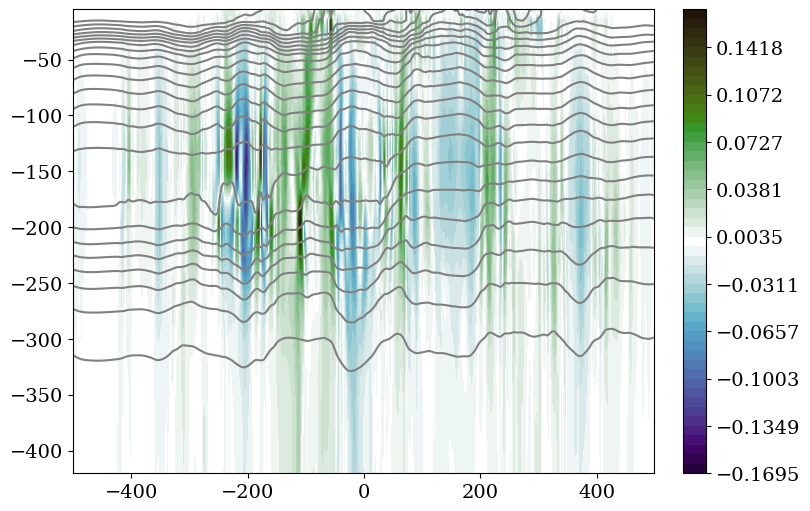

In [8]:
# plot salt section 4

myMax = saltSection4.max()
myMin = saltSection4.min()
myLevs = np.linspace(myMin,myMax,25)

myMax = abs(vortSection4).max()
myLevs1 = np.linspace(-myMax,myMax,50)

plt.figure(layout="constrained",figsize=(8,5))

horizDistanceKm = np.linspace(yMin[3],yMax[3],saltSection4.shape[1])*2 - 500
plt.contour(horizDistanceKm,depth,saltSection4,myLevs,colors="grey")
plt.contourf(horizDistanceKm,depth,vortSection4,myLevs1,cmap=myCmap)
plt.colorbar()

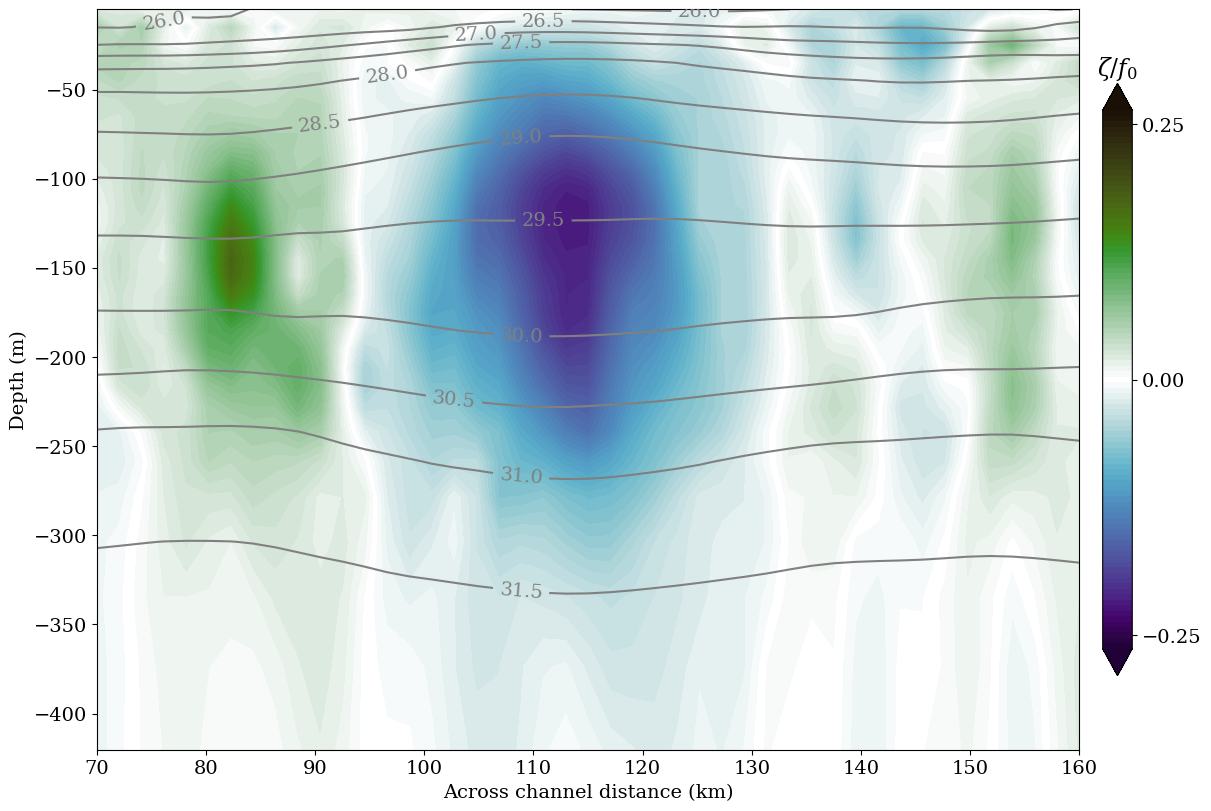

In [9]:
# plot salt section 3

myMax = saltSection3.max().round(0)
myMin = saltSection3.min().round(0)
myLevs = np.linspace(myMin,myMax,2*6+1)

myMax = abs(vortSection3).max()
myLevs1 = np.linspace(-myMax,myMax,100)*1.2

plt.figure(layout="constrained",figsize=(12,8))

horizDistanceKm = np.linspace(yMin[2],yMax[2],saltSection3.shape[1])*2 - 500
im1 = plt.contour(horizDistanceKm,depth,saltSection3,myLevs,
                  colors="grey", linewidths=1.5)
plt.contourf(horizDistanceKm,depth,vortSection3,myLevs1,cmap=myCmap,extend="both")
plt.clabel(im1)
cbar = plt.colorbar(pad=0.005,shrink=0.8,ticks=[-0.25,0,0.25])
cbar.ax.set_title("$\zeta/f_0$")
plt.ylabel("Depth (m)")
plt.xlabel("Across channel distance (km)")
# plt.title(f"@ xIndex={xIndex[2]}, tStep={timestep[2]}")

plt.savefig(saveloc+"officialFigs/figVortexSection.pdf",
           bbox_inches="tight")

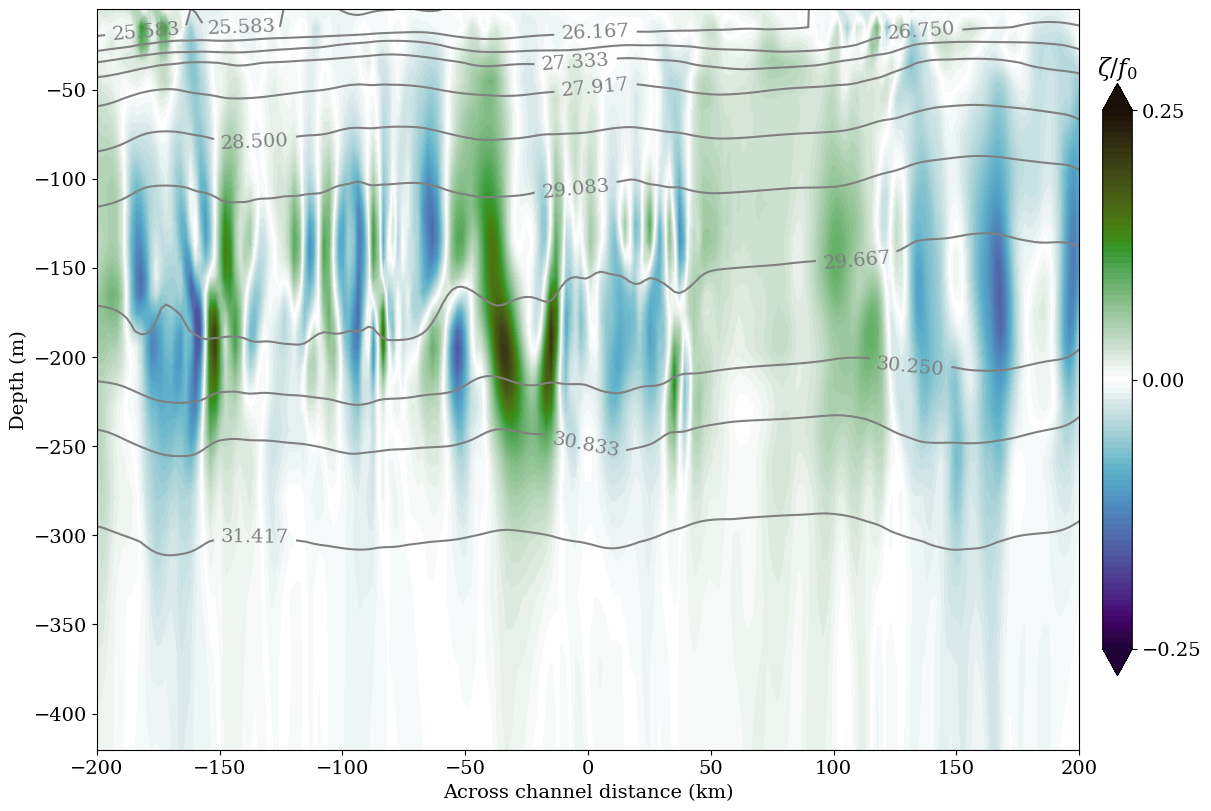

In [10]:
# plot salt section 1

myMax = saltSection1.max().round(0)
myMin = saltSection1.min().round(0)
myLevs = np.linspace(myMin,myMax,2*6+1)

myMax = abs(vortSection1).max()
myLevs1 = np.linspace(-myMax,myMax,100)*1.2

plt.figure(layout="constrained",figsize=(12,8))

horizDistanceKm = np.linspace(yMin[0],yMax[0],saltSection1.shape[1])*2 - 500
im1 = plt.contour(horizDistanceKm,depth,saltSection1,myLevs,
                  colors="grey", linewidths=1.5)
plt.contourf(horizDistanceKm,depth,vortSection1,myLevs1,cmap=myCmap,extend="both")
plt.clabel(im1)
cbar = plt.colorbar(pad=0.005,shrink=0.8,ticks=[-0.25,0,0.25])
cbar.ax.set_title("$\zeta/f_0$")
plt.ylabel("Depth (m)")
plt.xlabel("Across channel distance (km)")
# plt.title(f"@ xIndex={xIndex[2]}, tStep={timestep[2]}")

plt.savefig(saveloc+"officialFigs/figVortexSectionBackup.pdf",
           bbox_inches="tight")